## Nandini Kongani
## CWID: 20020621
## HW02 EDA

In [11]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Loading the dataset
df = pd.read_csv('breast-cancer-wisconsin.data.csv')

In [13]:
#Summarizing each column (e.g. min, max, mean )
summary = df.describe()
print(summary)

             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [14]:
#Identifying missing values
missing_values =df.isin(['?']).sum()
print(missing_values)

Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [15]:
# Replacing the missing values with the “mean” of the column
df.replace('?',np.nan, inplace=True)
df= df.apply(pd.to_numeric, errors='ignore')
df['F6'].fillna(df['F6'].mean(),inplace=True)

In [16]:
# Displaying the frequency table of “Class” vs. F6
frequency_table = pd.crosstab(index=df['Class'], columns=df['F6'])
print(frequency_table)


F6     1.000000   2.000000   3.000000   3.544656   4.000000   5.000000   \
Class                                                                     
2            387         21         14         14          6         10   
4             15          9         14          2         13         20   

F6     6.000000   7.000000   8.000000   9.000000   10.000000  
Class                                                         
2              0          1          2          0          3  
4              4          7         19          9        129  


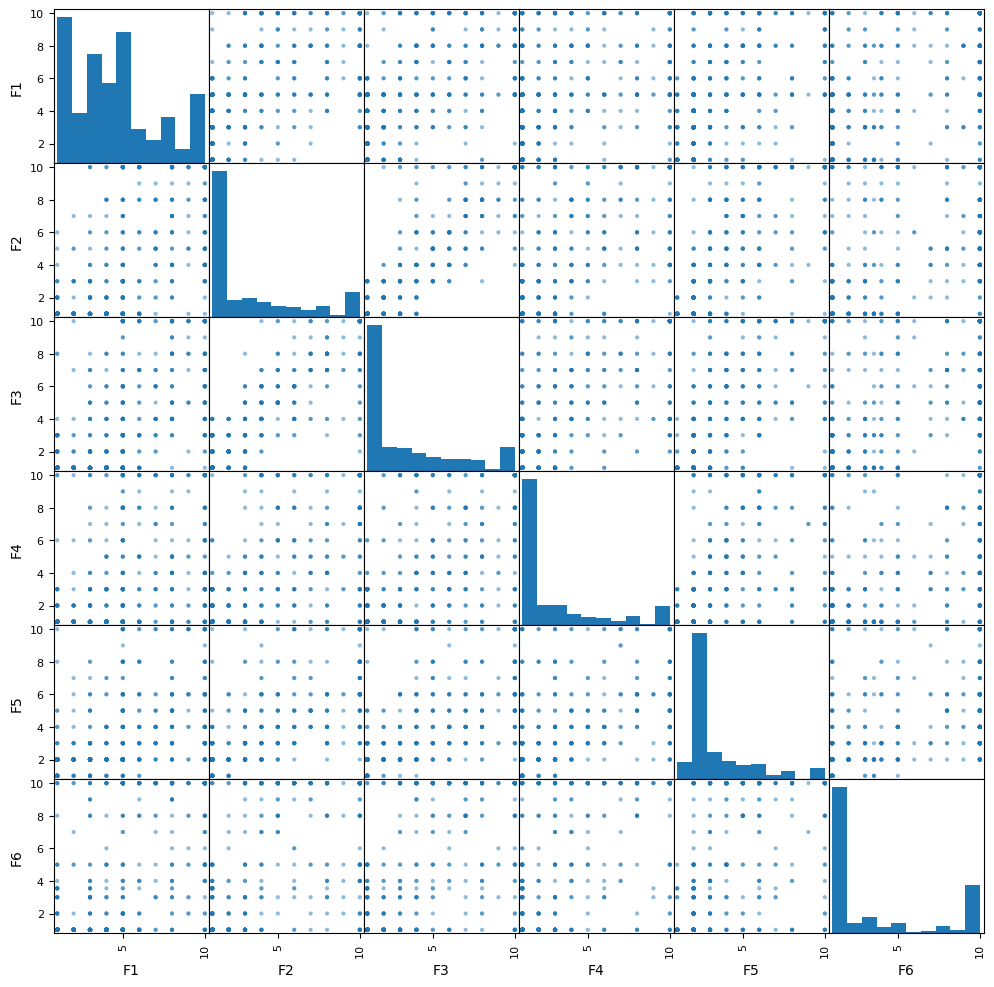

In [17]:
# Displaying the scatter plot of F1 to F6, one pair at a time
pd.plotting.scatter_matrix(df.loc[:, 'F1':'F6'], figsize=(12,12), diagonal='hist')

# Show plot
plt.show()


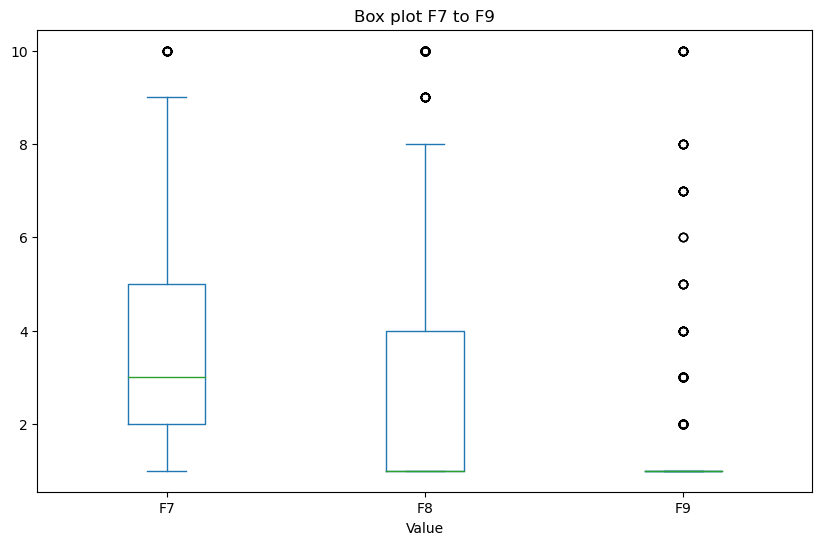

In [18]:
# histogram box plot for columns F7 to F9
subset=df.loc[:, 'F7':'F9']
subset.plot(kind="box", vert=True, figsize=(10, 6))
plt.title("Box plot F7 to F9", fontsize=12)
plt.xlabel("Value")
plt.show()


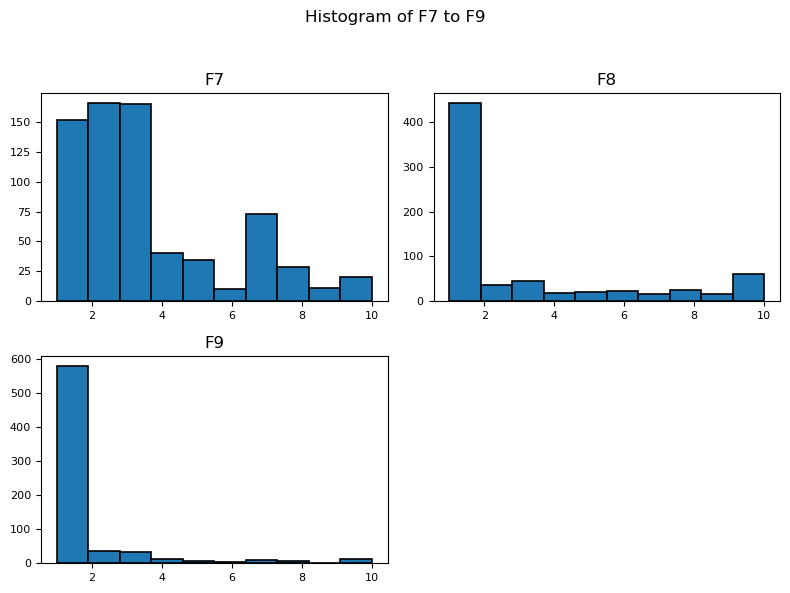

In [19]:
# Select columns F7 to F9
subset = df.loc[:, 'F7':'F9']

# Create a histogram
subset.hist(grid=False, bins=10, edgecolor="black", linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(8, 6))
plt.suptitle("Histogram of F7 to F9", fontsize=12)
plt.tight_layout(rect=(0,0,1,0.95))
plt.show()



In [20]:
#Remove any row with a missing value in any of the columns.
filename='breast-cancer-wisconsin.data.csv'
nan_values=['?']
att_type={' Sample': 'str' }

df=pd.read_csv(filename,dtype=att_type,na_values=nan_values)


print(df.shape)
print(df.isnull().sum())
print()
df.dropna(inplace=True)
print(f"shape : {df.shape}")
print(df.isnull().sum())
print(df.describe())
df.head()


(699, 11)
Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64

shape : (683, 11)
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64
             Sample          F1          F2          F3          F4  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F6 

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
